#Get NFL Player Data



In [39]:
import requests
from pandas.io.json import json_normalize
import pandas as pd
import requests

# https://sportsdata.io/developers/api-documentation/nfl

# Player overall information
#url = "https://api.sportsdata.io/v3/nfl/scores/json/Players?key=d072122708d34423857116889b72f55b"

# Player Season stats for 2020
url = "https://api.sportsdata.io/v3/nfl/stats/json/PlayerSeasonStats/2020?key=d072122708d34423857116889b72f55b"

# create a dataframe from data
df = pd.read_json(url)

url2019 = "https://api.sportsdata.io/v3/nfl/stats/json/PlayerSeasonStats/2019?key=d072122708d34423857116889b72f55b"
df2019 = pd.read_json(url)
df.append(df2019, ignore_index = True) 


url2018 = "https://api.sportsdata.io/v3/nfl/stats/json/PlayerSeasonStats/2018?key=d072122708d34423857116889b72f55b"
df2018 = pd.read_json(url)
df.append(df2018, ignore_index = True) 


df.shape[0] # number of players that played in 2018,2019, 2020

2399

# Show the first few rows of data returned - All players

In [27]:
df.head()

,PlayerID,SeasonType,Season,Team,Number,Name,Position,PositionCategory,Activated,Played,Started,PassingAttempts,PassingCompletions,PassingYards,PassingCompletionPercentage,PassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PassingInterceptions,PassingRating,PassingLong,PassingSacks,PassingSackYards,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,RushingLong,ReceivingTargets,Receptions,ReceivingYards,ReceivingYardsPerReception,ReceivingTouchdowns,ReceivingLong,Fumbles,FumblesLost,PuntReturns,PuntReturnYards,PuntReturnYardsPerAttempt,PuntReturnTouchdowns,...,ExtraPointsHadBlocked,PuntLong,BlockedKickReturnYards,FieldGoalReturnYards,PuntNetYards,SpecialTeamsFumblesForced,SpecialTeamsFumblesRecovered,MiscFumblesForced,MiscFumblesRecovered,ShortName,SafetiesAllowed,Temperature,Humidity,WindSpeed,OffensiveSnapsPlayed,DefensiveSnapsPlayed,SpecialTeamsSnapsPlayed,OffensiveTeamSnaps,DefensiveTeamSnaps,SpecialTeamsTeamSnaps,AuctionValue,AuctionValuePPR,TwoPointConversionReturns,FantasyPointsFanDuel,FieldGoalsMade0to19,FieldGoalsMade20to29,FieldGoalsMade30to39,FieldGoalsMade40to49,FieldGoalsMade50Plus,FantasyPointsDraftKings,FantasyPointsYahoo,AverageDraftPosition,AverageDraftPositionPPR,TeamID,GlobalTeamID,FantasyPointsFantasyDraft,AverageDraftPositionRookie,AverageDraftPositionDynasty,AverageDraftPosition2QB,ScoringDetails
0,430,1,2020,BAL,4,S.Koch,P,ST,15,15,0,1.1,1.1,15.6,104.2,15.6,15.6,0.0,0.0,123.7,15.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,61.5,0.0,0,0,0,0,0,0,S.Koch,0,55,55,10,69,0,65,1070,1108,350,NaN,NaN,0,0.7,0.0,0.0,0.0,0.0,0.0,0.7,0.7,NaN,NaN,3,3,0.7,NaN,NaN,NaN,[]
1,549,1,2020,DET,5,M.Prater,K,ST,16,16,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,M.Prater,0,56,51,10,29,66,0,1093,1164,346,NaN,NaN,0,121.9,0.0,4.3,7.6,4.3,6.5,121.9,0.0,NaN,NaN,11,11,0.0,NaN,NaN,NaN,"[{'GameKey': '202010111', 'SeasonType': 1, 'Pl..."
2,611,1,2020,NYJ,5,J.Flacco,QB,OFF,13,5,4,139.6,77.1,900.3,57.5,6.9,12.2,6.5,3.3,84.0,54.2,7.6,71.9,6.5,22.9,4.0,0.0,9.8,0.0,0.0,0.0,0.0,0.0,0.0,1.1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,J.Flacco,0,58,68,8,260,0,0,1031,1187,332,NaN,NaN,0,60.2,0.0,0.0,0.0,0.0,0.0,60.2,60.2,NaN,NaN,24,24,60.2,NaN,NaN,NaN,"[{'GameKey': '202010524', 'SeasonType': 1, 'Pl..."
3,722,1,2020,LV,82,J.Witten,TE,OFF,16,16,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.7,13.5,71.9,5.8,2.2,15.6,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,J.Witten,0,60,51,10,421,0,38,1127,1132,406,NaN,NaN,0,26.5,0.0,0.0,0.0,0.0,0.0,33.2,26.5,NaN,NaN,25,25,33.2,NaN,NaN,NaN,"[{'GameKey': '202010425', 'SeasonType': 1, 'Pl..."
4,732,1,2020,ATL,2,M.Ryan,QB,OFF,16,16,16,652.3,424.1,4773.4,67.7,7.9,11.8,27.1,11.5,97.2,65.6,42.7,267.8,30.2,95.9,3.5,2.2,16.7,0.0,0.0,0.0,0.0,0.0,0.0,6.5,3.3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,M.Ryan,0,65,59,10,1160,0,0,1169,1118,334,NaN,NaN,0,303.7,0.0,0.0,0.0,0.0,0.0,322.4,303.7,NaN,NaN,2,2,322.4,NaN,NaN,NaN,"[{'GameKey': '202010102', 'SeasonType': 1, 'Pl..."


# Focus on Wide Receivers

In [28]:
wr = df[ df['Position'] =='WR' ]
print (wr.shape) # Number of players (rows) and attributes (columns)

(278, 140)


In [29]:
# remove players with few games played or less than 10 Receiving Yards
wr = wr[ wr['Played'] >10]
wr = wr[ wr['ReceivingYards'] >10]

wr.describe()

,PlayerID,SeasonType,Season,Number,Activated,Played,Started,PassingAttempts,PassingCompletions,PassingYards,PassingCompletionPercentage,PassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PassingInterceptions,PassingRating,PassingLong,PassingSacks,PassingSackYards,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,RushingLong,ReceivingTargets,Receptions,ReceivingYards,ReceivingYardsPerReception,ReceivingTouchdowns,ReceivingLong,Fumbles,FumblesLost,PuntReturns,PuntReturnYards,PuntReturnYardsPerAttempt,PuntReturnTouchdowns,PuntReturnLong,KickReturns,KickReturnYards,KickReturnYardsPerAttempt,...,FieldGoalsHadBlocked,PuntsHadBlocked,ExtraPointsHadBlocked,PuntLong,BlockedKickReturnYards,FieldGoalReturnYards,PuntNetYards,SpecialTeamsFumblesForced,SpecialTeamsFumblesRecovered,MiscFumblesForced,MiscFumblesRecovered,SafetiesAllowed,Temperature,Humidity,WindSpeed,OffensiveSnapsPlayed,DefensiveSnapsPlayed,SpecialTeamsSnapsPlayed,OffensiveTeamSnaps,DefensiveTeamSnaps,SpecialTeamsTeamSnaps,AuctionValue,AuctionValuePPR,TwoPointConversionReturns,FantasyPointsFanDuel,FieldGoalsMade0to19,FieldGoalsMade20to29,FieldGoalsMade30to39,FieldGoalsMade40to49,FieldGoalsMade50Plus,FantasyPointsDraftKings,FantasyPointsYahoo,AverageDraftPosition,AverageDraftPositionPPR,TeamID,GlobalTeamID,FantasyPointsFantasyDraft,AverageDraftPositionRookie,AverageDraftPositionDynasty,AverageDraftPosition2QB
count,138.000000,138.0,138.0,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.0,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,...,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,0.0,0.0,138.0,138.000000,138.0,138.0,138.0,138.0,138.0,138.000000,138.000000,0.0,0.0,138.000000,138.000000,138.000000,0.0,0.0,0.0
mean,19127.347826,1.0,2020.0,32.427536,14.514493,14.485507,7.318841,0.198551,0.126812,2.506522,7.173188,1.568116,1.838406,0.063768,0.0,12.928261,2.000725,0.015942,0.152174,3.028261,15.089855,2.903623,0.111594,6.885507,68.026087,44.610870,562.816667,13.192029,3.767391,47.398551,0.876087,0.366667,4.053623,37.347101,3.309420,0.063768,9.833333,2.839855,65.660870,7.411594,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.188406,55.492754,8.956522,566.710145,0.500000,52.572464,1090.557971,1083.637681,356.391304,NaN,NaN,0.0,103.132609,0.0,0.0,0.0,0.0,0.0,129.578261,103.132609,NaN,NaN,17.318841,17.318841,129.578261,NaN,NaN,NaN
std,2770.734543,0.0,0.0,30.684381,1.603989,1.617584,5.309385,0.607494,0.509979,9.997249,25.330460,6.049709,6.932346,0.290216,0.0,39.379336,7.521662,0.131940,1.465377,7.383469,35.645852,4.488809,0.446572,10.848718,44.647025,30.853834,395.303895,3.160640,3.576651,18.780830,1.086114,0.628093,8.067970,79.380108,8.790397,0.257994,21.003772,6.753010,176.397647,11.354443,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.449906,7.326829,1.746193,285.659544,4.122663,66.966697,92.273318,90.096456,37.881767,NaN,NaN,0.0,73.073892,0.0,0.0,0.0,0.0,0.0,92.601561,73.073892,NaN,NaN,10.792661,10.792661,92.601561,NaN,NaN,NaN
min,5571.000000,1.0,2020.0,10.000000,11.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-12.500000,-6.300000,0.000000,0.000000,3.300000,1.100000,14.600000,4.100000,0.000000,10.400000,0.000000,0.000000,0.000000,-13.500000,-6.800000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.000000,39.000000,4.000000,34.000000,0.000000,0.000000,694.000000,750.000000,242.000000,NaN,NaN,0.0,1.200000,0.0,0.0,0.0,0.0,0.0,2.600000,1.200000,NaN,NaN,1.000000,1.000000,2.

In [30]:
yardsPerGame = wr['ReceivingYards']/wr['Played']

wr['yardsPerGame'] = yardsPerGame

In [31]:
# sample 2 rows from the dataframe
wr.sample(2)

,PlayerID,SeasonType,Season,Team,Number,Name,Position,PositionCategory,Activated,Played,Started,PassingAttempts,PassingCompletions,PassingYards,PassingCompletionPercentage,PassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PassingInterceptions,PassingRating,PassingLong,PassingSacks,PassingSackYards,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,RushingLong,ReceivingTargets,Receptions,ReceivingYards,ReceivingYardsPerReception,ReceivingTouchdowns,ReceivingLong,Fumbles,FumblesLost,PuntReturns,PuntReturnYards,PuntReturnYardsPerAttempt,PuntReturnTouchdowns,...,PuntLong,BlockedKickReturnYards,FieldGoalReturnYards,PuntNetYards,SpecialTeamsFumblesForced,SpecialTeamsFumblesRecovered,MiscFumblesForced,MiscFumblesRecovered,ShortName,SafetiesAllowed,Temperature,Humidity,WindSpeed,OffensiveSnapsPlayed,DefensiveSnapsPlayed,SpecialTeamsSnapsPlayed,OffensiveTeamSnaps,DefensiveTeamSnaps,SpecialTeamsTeamSnaps,AuctionValue,AuctionValuePPR,TwoPointConversionReturns,FantasyPointsFanDuel,FieldGoalsMade0to19,FieldGoalsMade20to29,FieldGoalsMade30to39,FieldGoalsMade40to49,FieldGoalsMade50Plus,FantasyPointsDraftKings,FantasyPointsYahoo,AverageDraftPosition,AverageDraftPositionPPR,TeamID,GlobalTeamID,FantasyPointsFantasyDraft,AverageDraftPositionRookie,AverageDraftPositionDynasty,AverageDraftPosition2QB,ScoringDetails,yardsPerGame
1951,21448,1,2020,LAC,15,J.Guyton,WR,OFF,16,16,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.2,0.0,0.0,0.0,4.3,57.3,29.2,532.5,19.0,3.3,75.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,J.Guyton,0,60,51,8,958,0,59,1222,1080,393,NaN,NaN,0,86.6,0.0,0.0,0.0,0.0,0.0,101.2,86.6,NaN,NaN,29,29,101.2,NaN,NaN,NaN,"[{'GameKey': '202010229', 'SeasonType': 1, 'Pl...",33.281250
396,16020,1,2020,CLE,80,J.Landry,WR,OFF,15,15,14,4.3,4.3,77.1,104.2,19.3,19.3,1.1,0.0,165.0,38.6,0.0,0.0,4.3,10.4,2.7,1.1,5.4,105.2,75.0,875.3,12.2,3.3,33.3,2.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,J.Landry,0,54,52,11,728,0,0,1106,1122,371,NaN,NaN,0,158.3,0.0,0.0,0.0,0.0,0.0,199.0,158.3,NaN,NaN,8,8,199.0,NaN,NaN,NaN,"[{'GameKey': '202010409', 'SeasonType': 1, 'Pl...",58.353333


# Create a histogram of the Yards Per Game

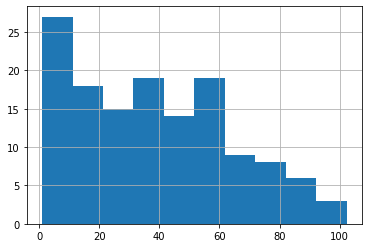

In [32]:
wr['yardsPerGame'].hist()


# Boxplot to show distribution 

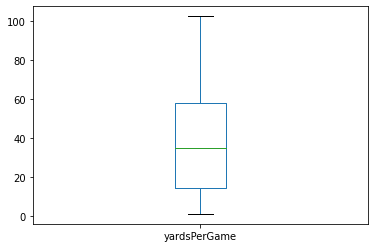

In [33]:
wr['yardsPerGame'].plot.box();

# Keep the main columns for analysis

In [34]:
colsKeep = ['PlayerID', 'Season','Team', 'Activated','Played','Started','ReceivingTargets',	'Receptions',	'ReceivingYards',	'ReceivingYardsPerReception','ReceivingTouchdowns','ReceivingLong','yardsPerGame']


In [35]:
new_wr = wr[colsKeep]
new_wr.head()

,PlayerID,Team,Activated,Played,Started,ReceivingTargets,Receptions,ReceivingYards,ReceivingYardsPerReception,ReceivingTouchdowns,ReceivingLong,yardsPerGame
26,5571,ARI,13,13,13,75.0,56.3,426.2,8.3,1.1,18.8,32.784615
56,9906,DET,14,14,5,71.9,47.9,627.3,13.7,0.0,52.1,44.807143
68,11063,NO,14,14,5,85.4,63.6,756.5,12.4,5.4,53.1,54.035714
90,11565,BUF,16,15,0,5.4,4.3,35.4,9.2,0.0,16.7,2.360000
95,11611,NYG,12,12,3,54.2,36.5,404.3,11.6,2.2,40.6,33.691667


# Retrieve data for all players for past 3 years and add salary for analysis


In [38]:
new_wr.groupby(['Team']).mean()['yardsPerGame']

Team
ARI    38.412895
ATL    37.312659
BAL    23.231937
BUF    45.375417
CAR    44.079833
CHI    33.305481
CIN    34.097036
CLE    39.748429
DAL    42.136250
DEN    31.876003
DET    35.774811
GB     50.596151
HOU    81.575152
IND    32.522383
JAX    39.204962
KC     42.070457
LAC    39.853726
LAR    45.797812
LV     32.819071
MIA    32.749405
MIN    56.795159
NE     30.390968
NO     35.850433
NYG    31.139410
NYJ    36.176563
PHI    30.345302
PIT    41.127750
SEA    47.753125
SF     39.583333
TB     38.512798
TEN    35.514564
WAS    36.600446
Name: yardsPerGame, dtype: float64